 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_file = Path('./Resources/whale_returns.csv')
# YOUR CODE HERE
df_whale = pd.read_csv(whale_file, index_col='Date', parse_dates=True, infer_datetime_format=True)
df_whale.sort_index(inplace = True)
df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
df_whale.describe()
df_whale.rename(columns ={"PAULSON & CO.INC. ": "PAULSON & CO.INC"}, inplace = True) 
df_whale.isna().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC               1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
df_whale = df_whale.dropna()
df_whale.isna().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC               0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_file = Path('./Resources/algo_returns.csv')
df_algo = pd.read_csv(algo_file, index_col='Date', parse_dates=True, infer_datetime_format=True)
df_algo.sort_index(inplace = True)
df_algo.head()
# YOUR CODE HERE

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
df_algo.isna().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
df_algo = df_algo.dropna()
df_algo.isna().sum()
df_algo.head()
# YOUR CODE HERE

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_file = Path('./Resources/sp500_history.csv')
df_sp500 = pd.read_csv(sp500_file, index_col='Date', parse_dates=True, infer_datetime_format=True)
df_sp500.sort_index(inplace = True)
df_sp500.head()
# YOUR CODE HERE

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
df_sp500.dtypes
# YOUR CODE HERE

Close    object
dtype: object

In [12]:
# Fix Data Types
df_sp500['Close'] = df_sp500['Close'].str.replace("$","").astype(float)
df_sp500.dtypes
# YOUR CODE HERE

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
df_sp_returns = df_sp500.pct_change()
df_sp_returns.tail()
# YOUR CODE HERE

,Close
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [14]:
# Drop nulls
df_sp_returns.dropna(inplace = True)
df_sp_returns.isna().sum()
# YOUR CODE HERE

Close    0
dtype: int64

In [15]:
# Rename Column
df_sp_returns.columns =["S&P 500"]
df_sp_returns.head()
# YOUR CODE HERE

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame
df_combined = pd.concat([df_whale, df_algo, df_sp_returns], axis=1, join='inner')
df_combined.sort_index(inplace=True)
df_combined.head()
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

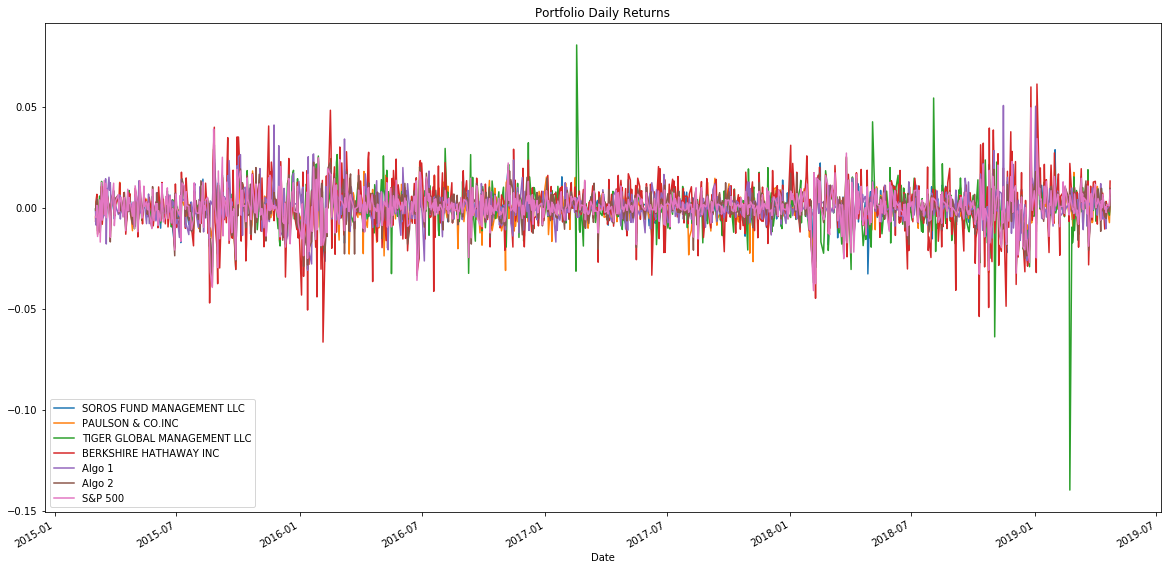

In [17]:
# Plot daily returns
df_combined.plot(figsize=(20, 10), title = "Portfolio Daily Returns")
# YOUR CODE HERE

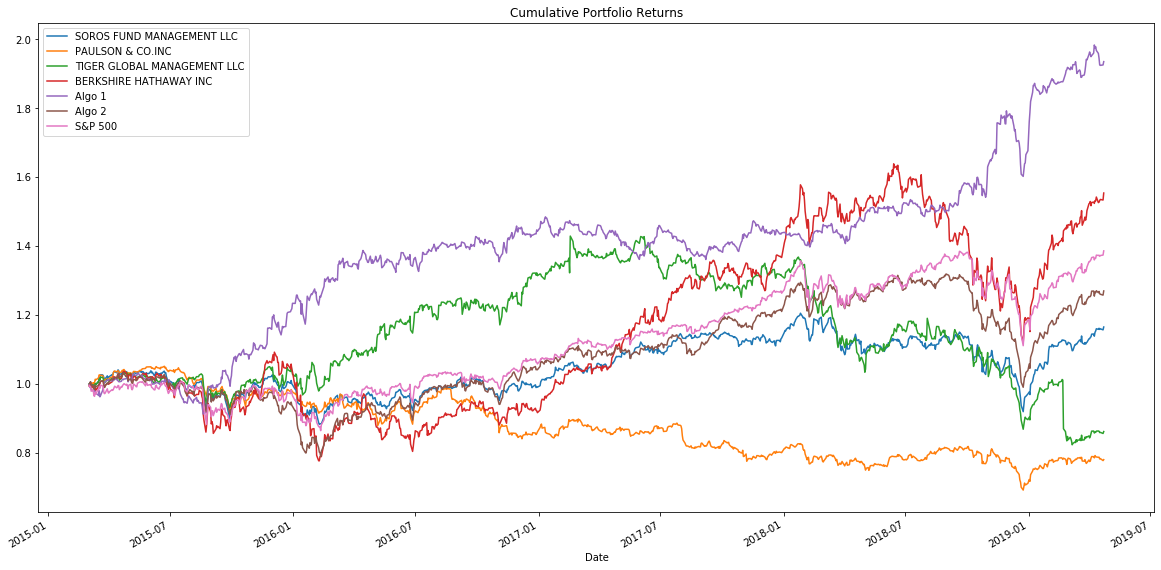

In [18]:
# Plot cumulative returns

cum_ret=(1+df_combined).cumprod()
cum_ret.plot(figsize=(20, 10), title = "Cumulative Portfolio Returns")

# YOUR CODE HERE

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

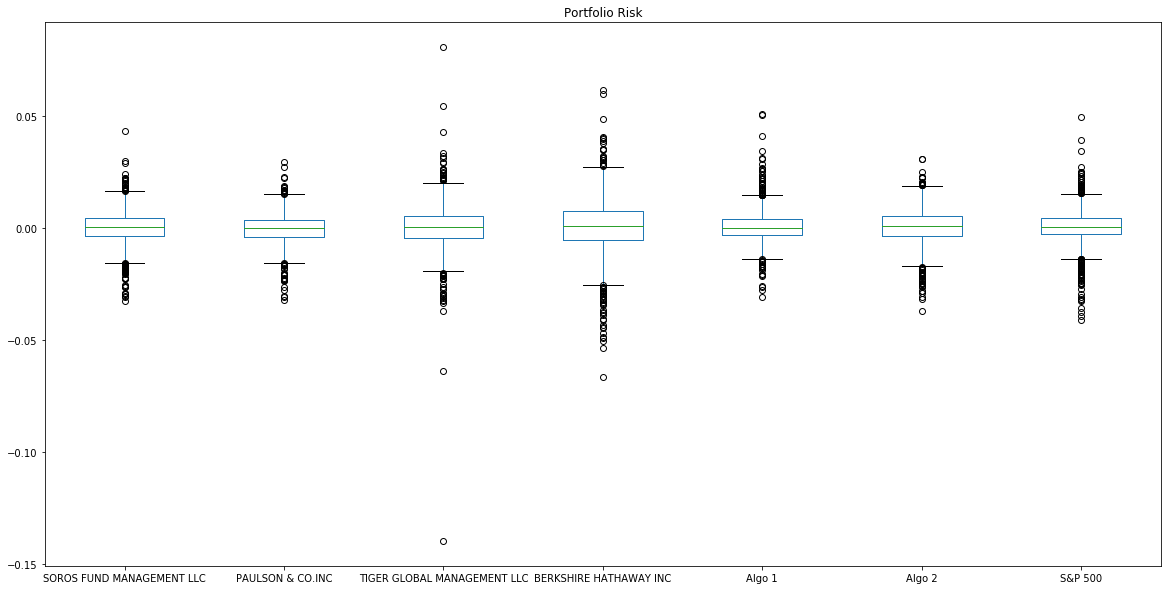

In [19]:
# Box plot to visually show risk
df_combined.plot(kind='box', figsize=(20, 10), title = "Portfolio Risk")
# YOUR CODE HERE



BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC               0.007023
dtype: float64

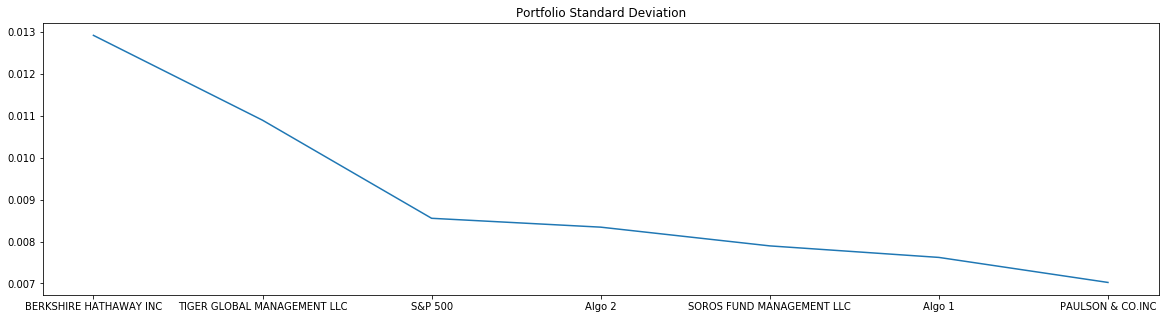

In [20]:
# Daily Standard Deviations

# Calculate the standard deviation for each portfolio. 
port_std_dev = df_combined.std().sort_values(ascending=False)
port_std_dev.plot(figsize=(20, 5), title = "Portfolio Standard Deviation")
port_std_dev
# YOUR CODE HERE

In [21]:
# Determine which portfolios are riskier than the S&P 500
port_std_dev.gt(port_std_dev['S&P 500'], fill_value=0)
# YOUR CODE HERE

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
S&P 500                        False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC               False
dtype: bool

In [22]:
# Calculate the annualized standard deviation (252 trading days)
Anual_port_risk =  df_combined.std()*np.sqrt(252)
Anual_port_risk.sort_values(ascending=False)
# YOUR CODE HERE

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC               0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

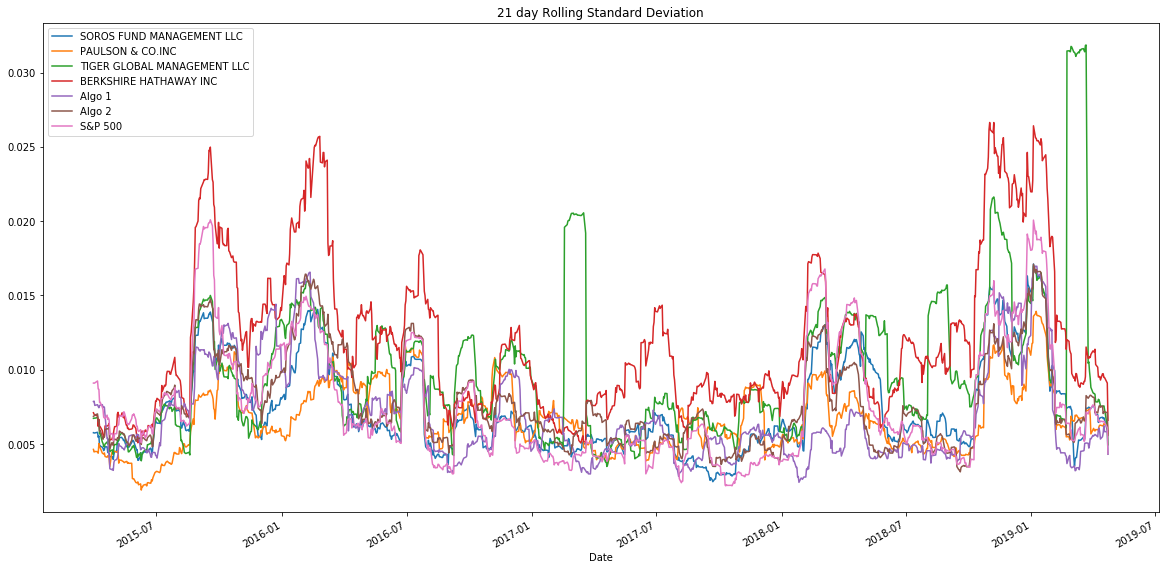

In [23]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
df_combined.rolling(window=21).std().plot(figsize=(20,10), title="21 day Rolling Standard Deviation")
# YOUR CODE HERE

In [24]:
# Construct a correlation table
correlation = df_combined.corr()
correlation
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


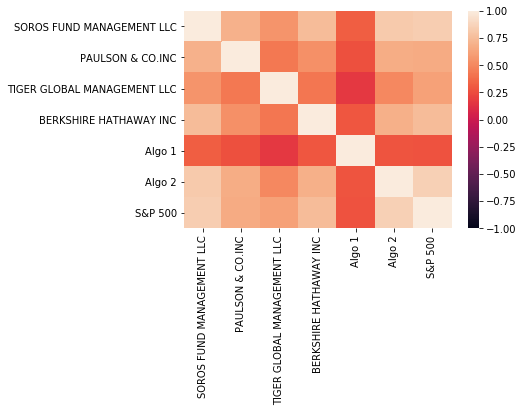

In [25]:
#visually checking the correlation heatmap
sns.heatmap(correlation, vmin=-1, vmax=1)

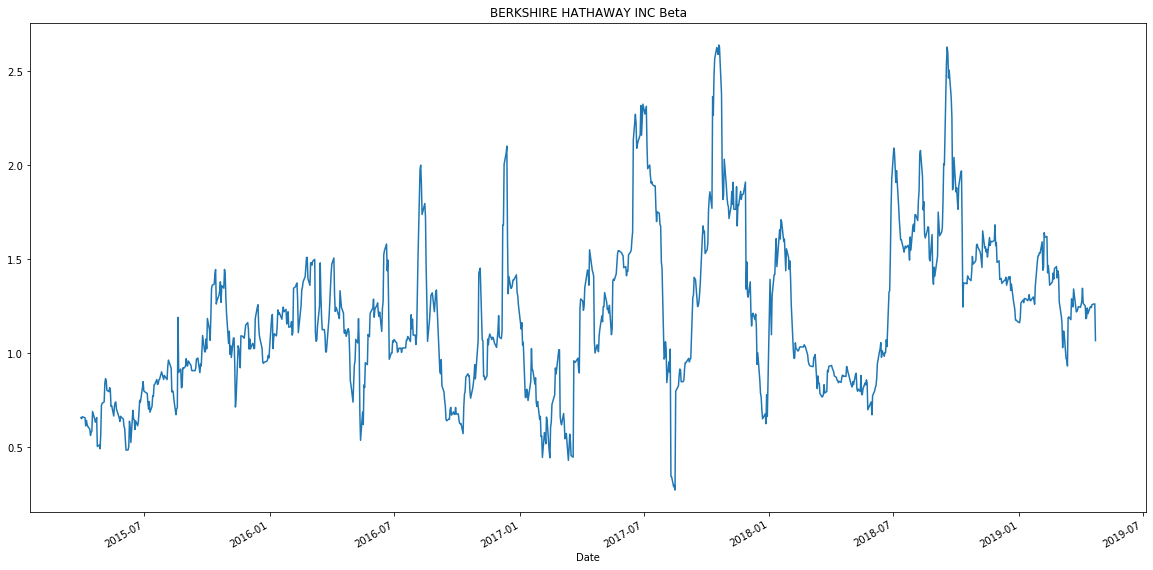

In [26]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
bks_rol21_cov = df_combined['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(df_combined['S&P 500'])
pci_rol21_cov = df_combined["PAULSON & CO.INC"].rolling(window=21).cov(df_combined['S&P 500'])
alg1_rol21_cov = df_combined['Algo 1'].rolling(window=21).cov(df_combined['S&P 500'])
sp500_rol21_var = df_combined['S&P 500'].rolling(window=21).var()
bks_beta = bks_rol21_cov/sp500_rol21_var
pci_beta = pci_rol21_cov/sp500_rol21_var
alg1_beta = alg1_rol21_cov/sp500_rol21_var

# YOUR CODE HERE
bks_beta.plot(figsize=(20,10), title="BERKSHIRE HATHAWAY INC Beta")

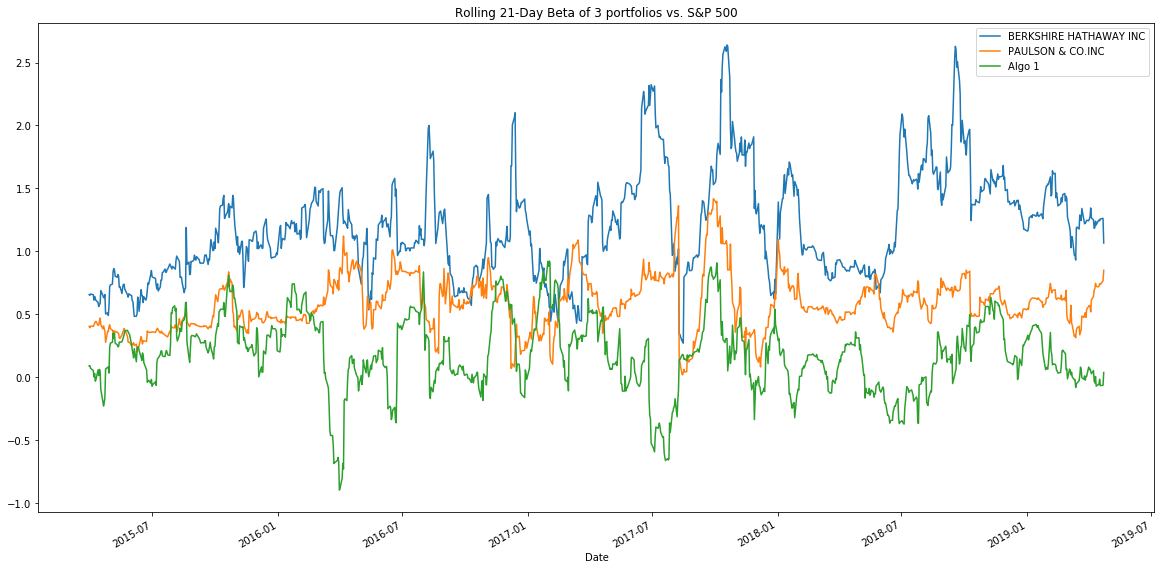

In [27]:
#3 portfolio Beta comparison
ax=bks_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of 3 portfolios vs. S&P 500')
pci_beta.plot(ax=ax)
alg1_beta.plot(ax=ax)
# Set the legend of the figure
ax.legend(["BERKSHIRE HATHAWAY INC", "PAULSON & CO.INC", 'Algo 1'])

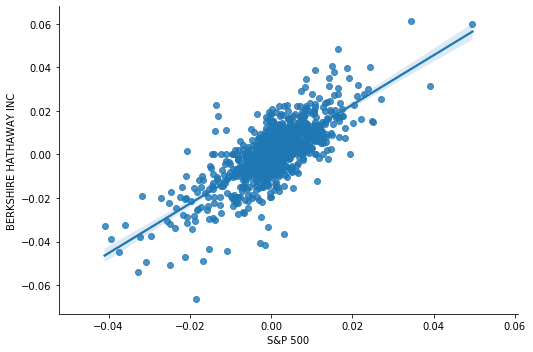

In [28]:
# visually checking the beta vs. correlation by plotting a scatterplot using the Seaborn library 
import seaborn as sns
sns.lmplot(x='S&P 500', y='BERKSHIRE HATHAWAY INC', data=df_combined, aspect=1.5, fit_reg=True)

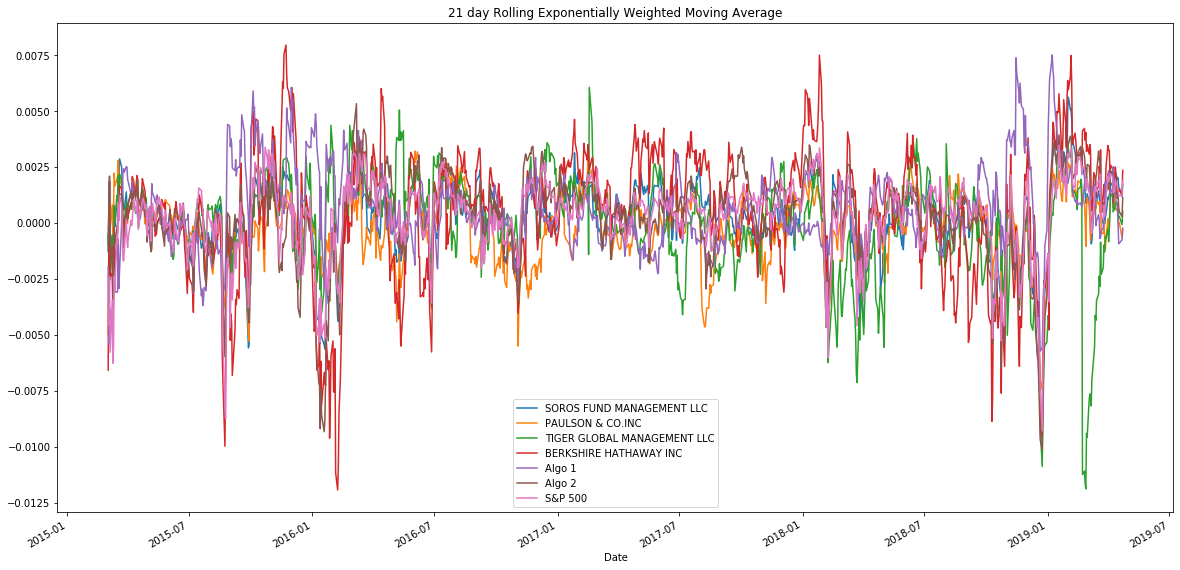

In [29]:
# Calculate a rolling window using the exponentially weighted moving average. 
rol21_ewma = df_combined.ewm(span=21).mean()
rol21_ewma.plot(figsize=(20,10), title="21 day Rolling Exponentially Weighted Moving Average" )
# YOUR CODE HERE

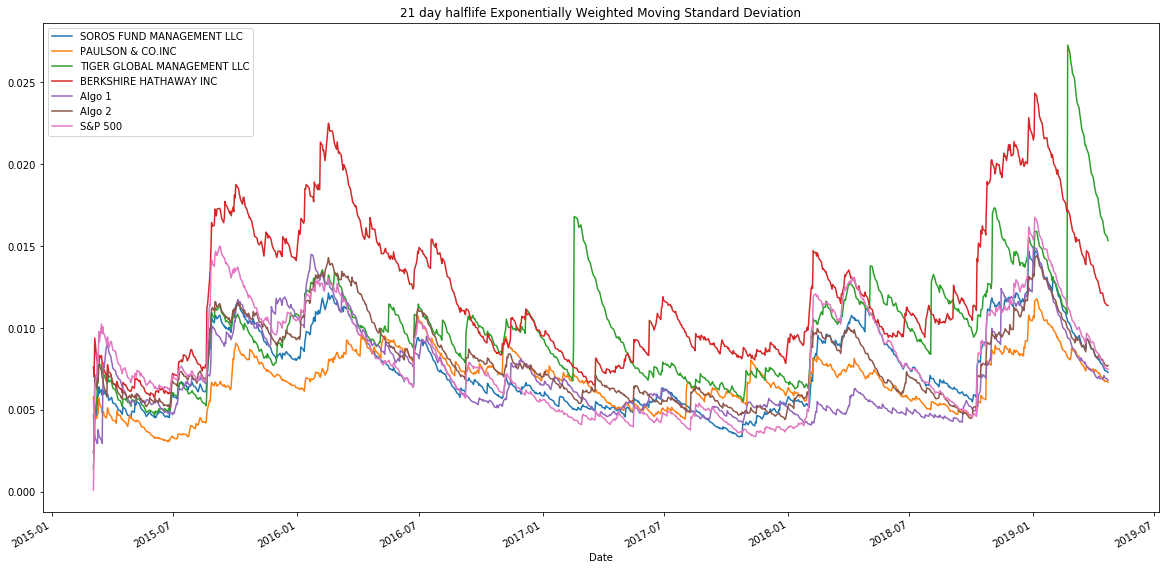

In [30]:
# Calculate a rolling window using the exponentially weighted moving Standard Deviation for 21 day halflife
rol21_ewms = df_combined.ewm(halflife=21).std()
rol21_ewms.plot(figsize=(20,10), title="21 day halflife Exponentially Weighted Moving Standard Deviation" )
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [31]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = df_combined.mean()*252/(df_combined.std()*np.sqrt(252))
sharpe_ratio
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC              -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

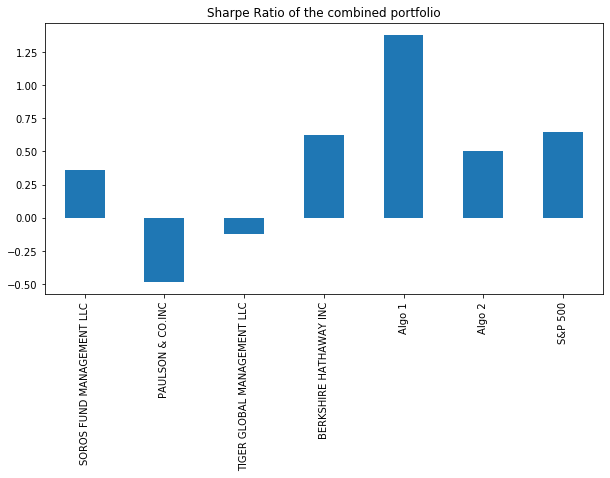

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', figsize=(10,5), title="Sharpe Ratio of the combined portfolio")
# YOUR CODE HERE

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

## Answer: Algo Strategies outperform both S&P 500 and Whales

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

# Airline Stocks Portfolio - NASDAQ

In [34]:
# Read the first stock - AMERICAN AIRLINES
AAL_file = Path('./Resources/Airline_Stocks/AAL.xlsx')
df_AAL = pd.read_excel(AAL_file, index_col= 'Date', parse_dates=True, infer_datetime_format=True)
df_AAL.index = df_AAL.index.date
df_AAL = df_AAL.rename(columns={'Close': "AAL"})
df_UAL.sort_index(inplace=True)
df_AAL.head()
# YOUR CODE HERE

,AAL
2016-01-04,40.91
2016-01-05,40.52
2016-01-06,41.23
2016-01-07,40.45
2016-01-08,40.37


In [39]:
# Read the second stock - United Airlines
UAL_file = Path('./Resources/Airline_Stocks/UAL.xlsx')
df_UAL = pd.read_excel(UAL_file, index_col= 'Date', parse_dates=True, infer_datetime_format = True)
df_UAL = df_UAL.rename(columns={'Close': "UAL"})
df_UAL.index = df_UAL.index.date
df_UAL.sort_index(inplace=True)
df_UAL.head()
# YOUR CODE HERE

,UAL
2016-01-04,55.61
2016-01-05,55.06
2016-01-06,55.20
2016-01-07,52.63
2016-01-08,51.89


In [35]:
# Read the third stock - Hawaian Airlines
HA_file = Path('./Resources/Airline_Stocks/HA.xlsx')
df_HA = pd.read_excel(HA_file, index_col= 'Date', parse_dates=True, infer_datetime_format = True)
df_HA = df_HA.rename(columns={'Close': "HA"})
df_HA.index = df_HA.index.date
df_HA.sort_index(inplace=True)
df_HA.head()
# YOUR CODE HERE

,HA
2016-01-04,32.81
2016-01-05,32.03
2016-01-06,32.53
2016-01-07,32.28
2016-01-08,31.94


In [36]:
# Read the Fourth stock - Jet Blue
JBLU_file = Path('./Resources/Airline_Stocks/JBLU.xlsx')
df_JBLU = pd.read_excel(JBLU_file, index_col= 'Date', parse_dates=True, infer_datetime_format = True)
df_JBLU = df_JBLU.rename(columns={'Close': "JBLU"})
df_JBLU.index = df_JBLU.index.date
df_JBLU.sort_index(inplace=True)
df_JBLU.sample()
# YOUR CODE HERE

,JBLU
2016-03-30,21.28


In [37]:
# Read the Market Index - NASDAQ
NASD_file = Path('./Resources/Airline_Stocks/NASD.xlsx')
df_NASD = pd.read_excel(NASD_file, index_col= 'Date', parse_dates=True, infer_datetime_format = True)
df_NASD = df_NASD.rename(columns={'Close': "NADQ"})
df_NASD.index = df_NASD.index.date
df_NASD.sort_index(inplace=True)
df_NASD.head()
# YOUR CODE HERE

,NADQ
2016-01-04,56.54
2016-01-05,57.40
2016-01-06,57.23
2016-01-07,57.10
2016-01-08,55.81


In [40]:
# Concatenate all stocks into a single DataFrame
df_airlines=pd.concat([df_AAL, df_UAL, df_HA, df_JBLU, df_NASD], axis=1, join='inner')
df_airlines.sort_index(inplace = True) 
df_airlines.head()
# YOUR CODE HERE

,AAL,UAL,HA,JBLU,NADQ
2016-01-04,40.91,55.61,32.81,21.88,56.54
2016-01-05,40.52,55.06,32.03,21.79,57.40
2016-01-06,41.23,55.20,32.53,21.85,57.23
2016-01-07,40.45,52.63,32.28,20.78,57.10
2016-01-08,40.37,51.89,31.94,20.28,55.81


In [106]:
# Reset the index

# Index is already sest to Date. no need to reset the index.

# YOUR CODE HERE

#### My Data files from Google finance didnt have Symbol or NOCP as columns. 
#### It came with simple Date and Closing price columns.
#### Didnt see a need for pivoting to represent unique symbol as column

In [107]:
# Pivot so that each column of prices represents a unique symbol

# no need to create a pivot table.

# YOUR CODE HERE

In [41]:
# Drop Nulls
df_airlines.isna().sum()
#No nulls in the data sets. 

# YOUR CODE HERE

AAL     0
UAL     0
HA      0
JBLU    0
NADQ    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

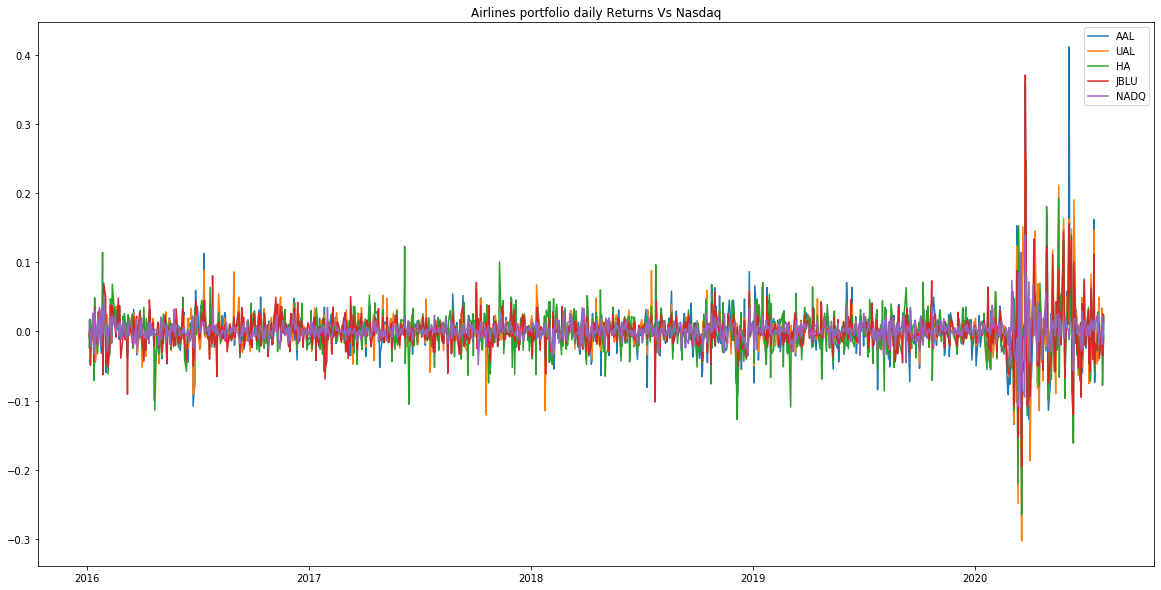

In [42]:
# Calculate weighted portfolio returns
airlines_daily_ret = df_airlines.pct_change()
airlines_daily_ret.plot(figsize=(20,10), title ="Airlines portfolio daily Returns Vs Nasdaq")

# YOUR CODE HERE

In [43]:
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
weighted_ret = airlines_daily_ret.dot(weights)
weighted_ret.head()

2016-01-04         NaN
2016-01-05   -0.006420
2016-01-06    0.007093
2016-01-07   -0.024881
2016-01-08   -0.014645
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
df_joined = pd.concat([df_combined, airlines_daily_ret], axis=1, join='inner')
df_joined.head()
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAL,UAL,HA,JBLU,NADQ
2016-01-04,-0.013263,-0.006037,-0.006017,-0.043190,-0.000307,-0.014485,-0.015304,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,0.002012,-0.009533,-0.009890,-0.023773,-0.004113,0.015210
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.013115,0.017522,0.002543,0.015610,0.002754,-0.002962
2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.023700,-0.018918,-0.046558,-0.007685,-0.048970,-0.002272
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.010838,-0.001978,-0.014060,-0.010533,-0.024062,-0.022592


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_joined.isna().sum()
df_joined.dropna(inplace = True)
df_joined

# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAL,UAL,HA,JBLU,NADQ
2016-01-05,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,0.002012,-0.009533,-0.009890,-0.023773,-0.004113,0.015210
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.013115,0.017522,0.002543,0.015610,0.002754,-0.002962
2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.023700,-0.018918,-0.046558,-0.007685,-0.048970,-0.002272
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.010838,-0.001978,-0.014060,-0.010533,-0.024062,-0.022592
2016-01-11,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,0.000853,0.017587,-0.005203,0.008766,0.010355,0.026339
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008296,0.007690,0.011156,-0.002953,0.014468
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.010285,0.047787,0.023738,0.005924,0.005014
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.000291,-0.010758,-0.005225,-0.001178,-0.002328
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.025895,-0.008156,-0.025279,-0.007665,-0.002889


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

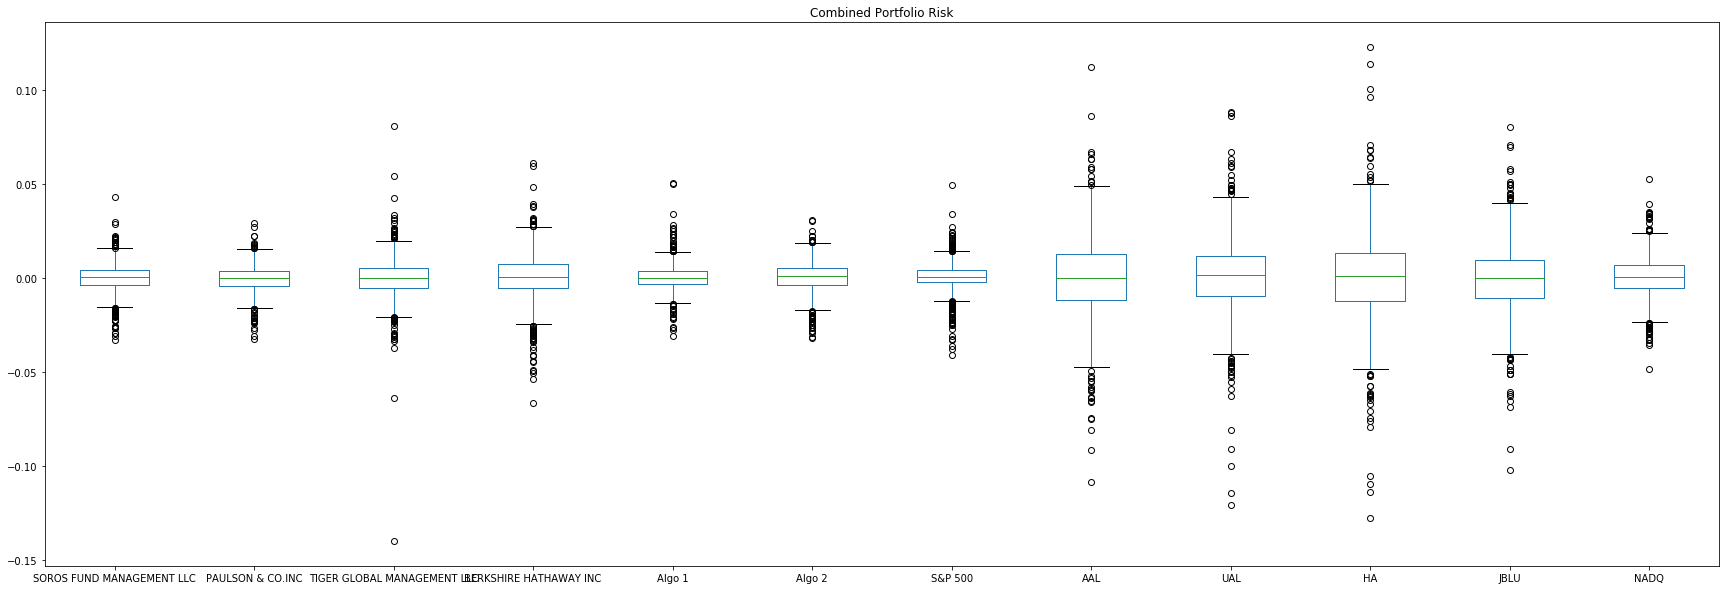

In [48]:
# Risk
df_joined.plot(kind='box', figsize=(30, 10), title = "Combined Portfolio Risk")
# YOUR CODE HERE

HA                             0.024891
AAL                            0.022396
UAL                            0.020650
JBLU                           0.018881
BERKSHIRE HATHAWAY INC         0.012904
TIGER GLOBAL MANAGEMENT LLC    0.011444
NADQ                           0.011008
Algo 2                         0.008250
S&P 500                        0.008153
SOROS FUND MANAGEMENT LLC      0.007884
PAULSON & CO.INC               0.007274
Algo 1                         0.007259
dtype: float64

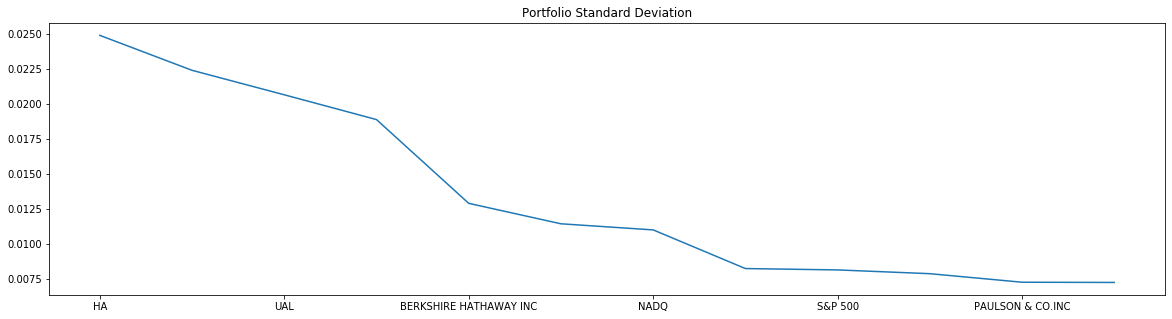

In [49]:
# Daily Standard Deviations

# Calculate the standard deviation for each portfolio. 
joined_std_dev = df_joined.std().sort_values(ascending=False)
joined_std_dev.plot(figsize=(20, 5), title = "Portfolio Standard Deviation")
joined_std_dev

In [50]:
# Determine which portfolios are riskier than the S&P 500
joined_std_dev.gt(joined_std_dev['S&P 500'], fill_value=0)

# YOUR CODE HERE
#Airlines portfolio is riskier than the whale and algo portfolios when compared against S&P 500.


HA                              True
AAL                             True
UAL                             True
JBLU                            True
BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
NADQ                            True
Algo 2                          True
S&P 500                        False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC               False
Algo 1                         False
dtype: bool

In [51]:
#compare against NASDAQ
joined_std_dev.gt(joined_std_dev['NADQ'], fill_value=0)
# when compared against NASDAQ, airlines stocks, Berkshire and Tiger stocks are riskier amongst the compbined portfolios.
#Algo portfolio is the best.

HA                              True
AAL                             True
UAL                             True
JBLU                            True
BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
NADQ                           False
Algo 2                         False
S&P 500                        False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC               False
Algo 1                         False
dtype: bool

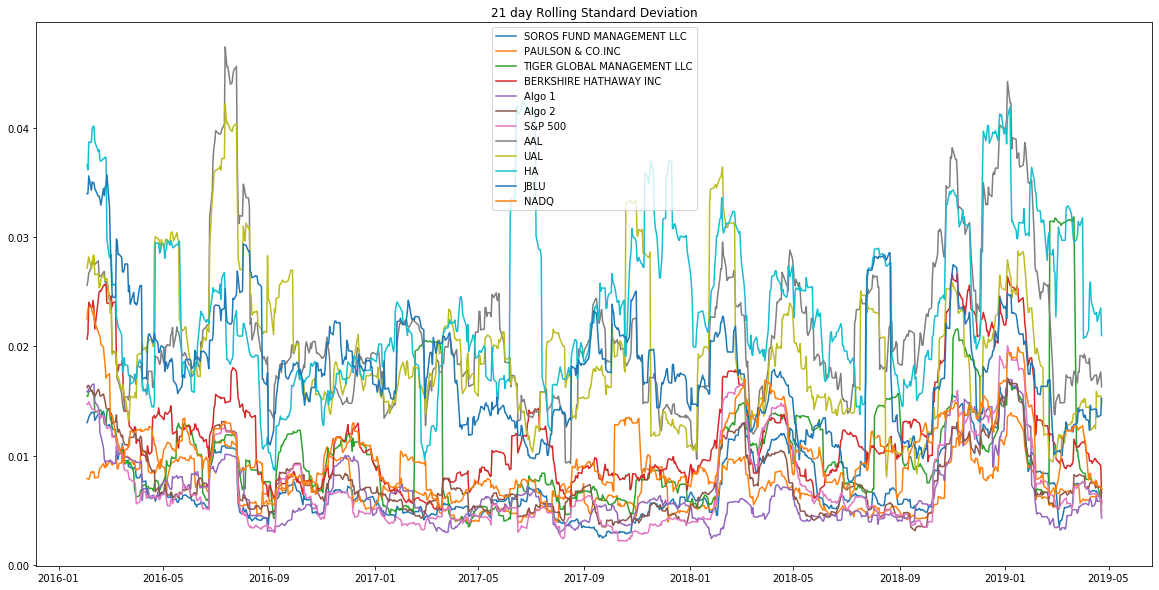

In [52]:
# Rolling

# Calculate and plot the rolling standard deviation for
# the S&P 500 and combined portfolios using a 21 trading day window
df_joined.rolling(window=21).std().plot(figsize=(20,10), title="21 day Rolling Standard Deviation")
# YOUR CODE HERE


In [53]:
# Annualized Sharpe Ratios
sharpe_ratio = df_joined.mean()*252/(df_joined.std()*np.sqrt(252))
sharpe_ratio
# YOUR CODE HERE


SOROS FUND MANAGEMENT LLC      0.471964
PAULSON & CO.INC              -0.517669
TIGER GLOBAL MANAGEMENT LLC   -0.192931
BERKSHIRE HATHAWAY INC         0.770941
Algo 1                         1.244566
Algo 2                         0.809963
S&P 500                        0.948935
AAL                            0.019514
UAL                            0.589882
HA                             0.140735
JBLU                          -0.073102
NADQ                           0.888328
dtype: float64

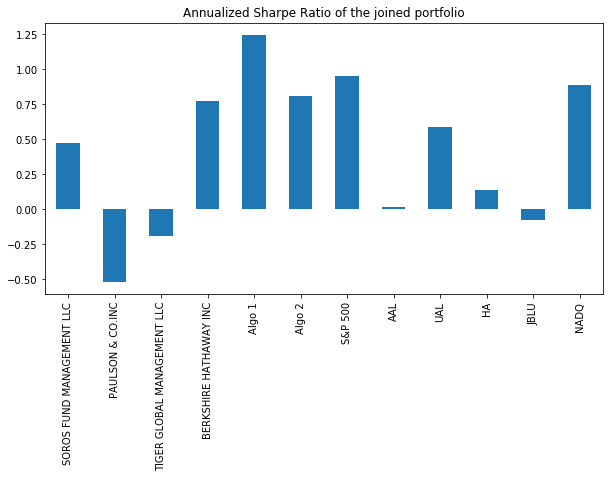

In [54]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', figsize=(10,5), title="Annualized Sharpe Ratio of the joined portfolio")
# YOUR CODE HERE

In [55]:
# Create a correlation analysis
correlation = df_joined.corr()
correlation
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAL,UAL,HA,JBLU,NADQ
SOROS FUND MANAGEMENT LLC,1.000000,0.679354,0.513527,0.748421,0.288009,0.814377,0.830200,0.507202,0.448434,0.355153,0.448174,0.468938
PAULSON & CO.INC,0.679354,1.000000,0.389220,0.522088,0.250802,0.673784,0.663940,0.398613,0.343051,0.276761,0.383720,0.337161
TIGER GLOBAL MANAGEMENT LLC,0.513527,0.389220,1.000000,0.376581,0.136751,0.453018,0.570871,0.290509,0.266225,0.248263,0.302051,0.346946
BERKSHIRE HATHAWAY INC,0.748421,0.522088,0.376581,1.000000,0.276174,0.681076,0.758398,0.470129,0.395496,0.274747,0.364703,0.406164
Algo 1,0.288009,0.250802,0.136751,0.276174,1.000000,0.272315,0.267796,0.185078,0.180543,0.115646,0.214970,0.168923
Algo 2,0.814377,0.673784,0.453018,0.681076,0.272315,1.000000,0.859990,0.511555,0.474855,0.363535,0.465836,0.457835
S&P 500,0.830200,0.663940,0.570871,0.758398,0.267796,0.859990,1.000000,0.531903,0.477871,0.369213,0.471332,0.593418
AAL,0.507202,0.398613,0.290509,0.470129,0.185078,0.511555,0.531903,1.000000,0.770176,0.509799,0.651333,0.311431
UAL,0.448434,0.343051,0.266225,0.395496,0.180543,0.474855,0.477871,0.770176,1.000000,0.471323,0.584691,0.294576
HA,0.355153,0.276761,0.248263,0.274747,0.115646,0.363535,0.369213,0.509799,0.471323,1.000000,0.456986,0.233174


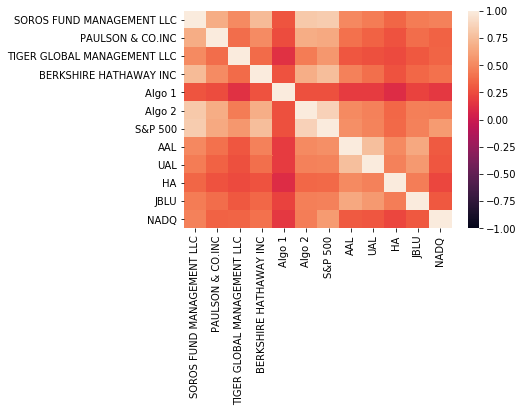

In [56]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)

In [57]:
#  rolling 21 day Beta of Airlines portfolio and Algo1 
alg1_rol21_cov = df_joined['Algo 1'].rolling(window=21).cov(df_joined['NADQ'])
sp500_rol21_var = df_joined['S&P 500'].rolling(window=21).var()
aal_rol21_cov = df_joined['AAL'].rolling(window=21).cov(df_joined['NADQ'])
ual_rol21_cov = df_joined['UAL'].rolling(window=21).cov(df_joined['NADQ'])
ha_rol21_cov = df_joined['HA'].rolling(window=21).cov(df_joined['NADQ'])
jblu_rol21_cov = df_joined['JBLU'].rolling(window=21).cov(df_joined['NADQ'])
nasd_rol21_var = df_joined['NADQ'].rolling(window=21).var()

aal_beta = aal_rol21_cov/nasd_rol21_var
ual_beta = ual_rol21_cov/nasd_rol21_var
ha_beta = ha_rol21_cov/nasd_rol21_var
jblu_beta = jblu_rol21_cov/nasd_rol21_var
alg1_beta = alg1_rol21_cov/nasd_rol21_var
# YOUR CODE HERE

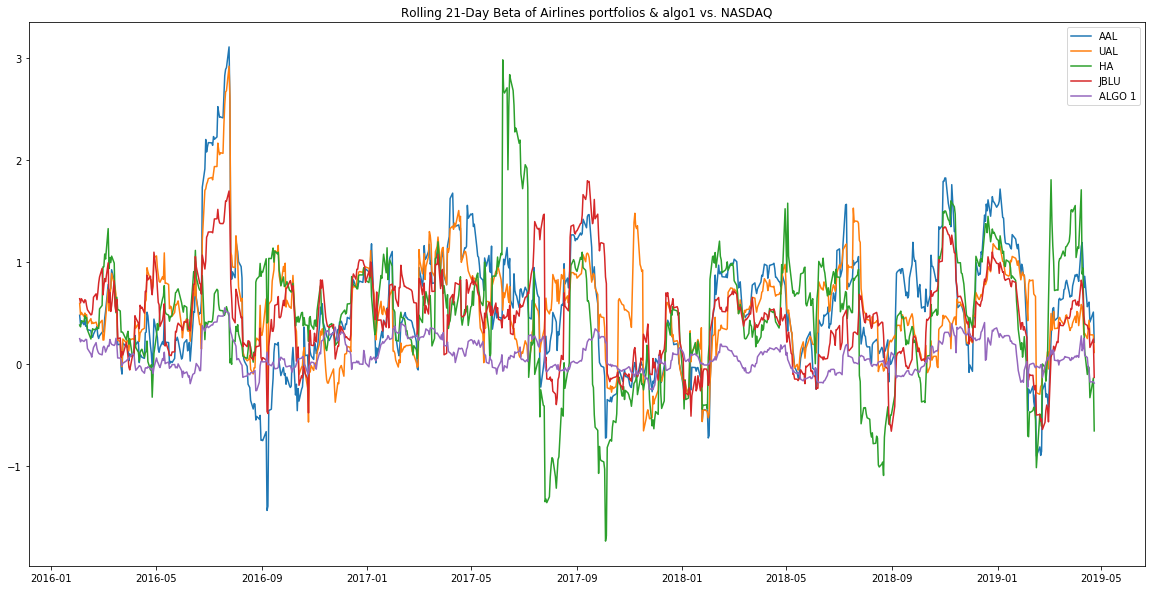

In [58]:
ax=aal_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of Airlines portfolios & algo1 vs. NASDAQ')
ual_beta.plot(ax=ax)
ha_beta.plot(ax=ax)
jblu_beta.plot(ax=ax)
alg1_beta.plot(ax=ax)
# Set the legend of the figure
ax.legend(["AAL", "UAL", 'HA', 'JBLU', 'ALGO 1'])

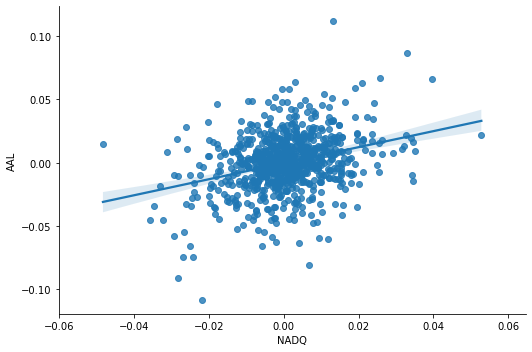

In [59]:
# visually checking AAL beta vs. correlation by plotting a scatterplot using the Seaborn library 
import seaborn as sns
sns.lmplot(x='NADQ', y='AAL', data=df_joined, aspect=1.5, fit_reg=True)

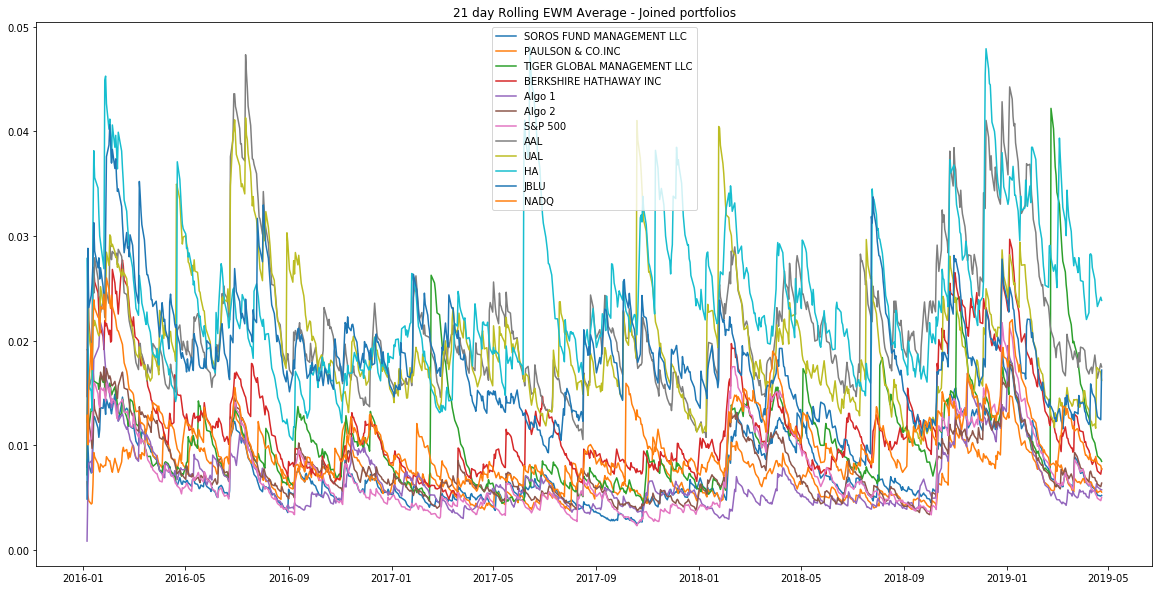

In [60]:
# Calculate a rolling window using the exponentially weighted moving average. 
rol21_ewma = df_joined.ewm(span=21).std()
rol21_ewma.plot(kind='line', figsize=(20,10), title="21 day Rolling EWM Average - Joined portfolios" )
# YOUR CODE HERE

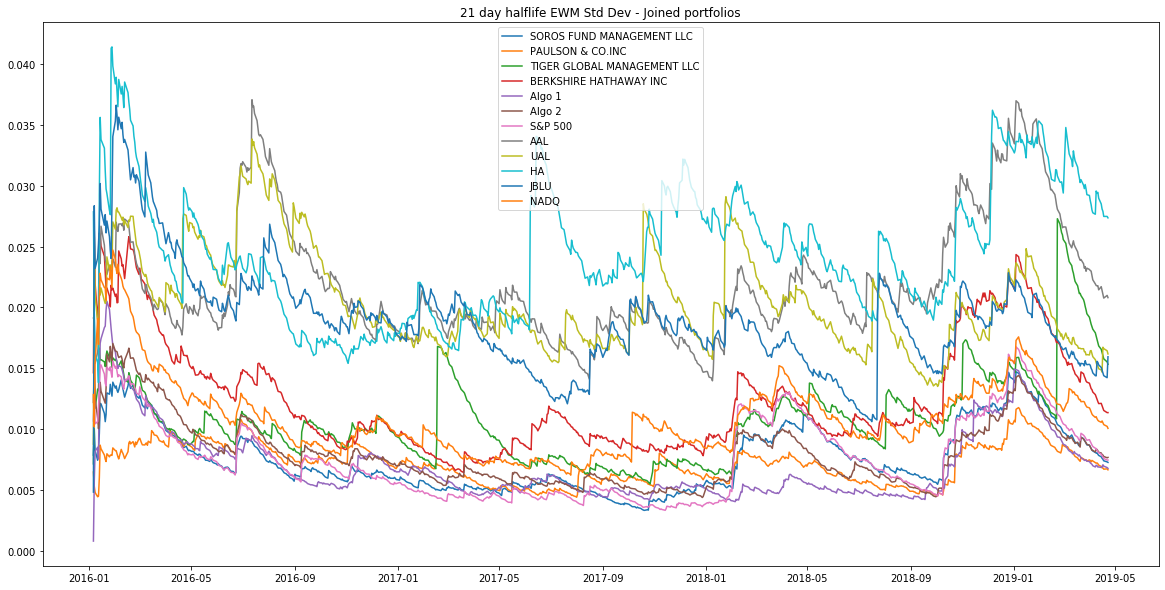

In [61]:
# Calculate a rolling window using the exponentially weighted moving Standard. 
rol21_ewms = df_joined.ewm(halflife=21).std()
rol21_ewms.plot(kind='line', figsize=(20,10), title="21 day halflife EWM Std Dev - Joined portfolios" )
# YOUR CODE HERE